## Final Project Submission
* Student name: Charles Owiti, Noel Seda, Michelle Chekwoti , Alex Mwera
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Mildred Jepkosgei

## Business Problem: 

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

Objectives:
- Analyse movie ratings, number of subscriptions in order to determine the best movies.
- Business recommendations for the new studio for popular genres that will attract large audiences
- Analyse Feedback of users.
- Analysis of high rates genres that could be successful.

The Aim: is to analyse the movie industry to find the gaps in original video content that will allow our new studio to create succesful films.

## Data Understanding

In [4]:
# Importing the relevant libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [5]:
# Connecting to the IMDB database
conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [6]:
# View database tables
tables_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(tables_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


They are 7 tables in the database and we will focus on the Movie_basics and Movie_ratings.

In [7]:
movie_basics_query = """SELECT * FROM movie_basics ;"""

pd.read_sql(movie_basics_query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
movie_ratings_query = """SELECT * FROM movie_ratings ;"""

pd.read_sql(movie_ratings_query, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


The Movie basics table consists of:
- `movie_Id`: The unique id for each movie and the Primary Key.
- `primary_title`: The title of the movie.
- `genres`: The genre(s) of the movie.
  
The Movie ratings table consists of:
- `average_rating`: The average rating given by users.
- `num_votes`: The number of votes a movie has received.
    
Our goal is to analyze the relationship between ratings, votes, and genres.

## Data Preparation and Cleaning

Joining movie_basics table and movie_ratings table which eliminates all movie_basics without ratings on movie_ratings table

In [40]:
data_preparation_query = """SELECT mb.movie_id ,mb.primary_title,mb.original_title,mb.start_year,mb.runtime_minutes,mb.genres,mr.averagerating,mr.numvotes FROM movie_basics AS mb INNER JOIN movie_ratings as mr ON mr.movie_id = mb.movie_id
;"""

movies_df = pd.read_sql(data_preparation_query, conn)
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [41]:
# check the datatypes
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [42]:
# Check Null Values
movies_df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

Fill null genres with `unknown`

In [43]:
movies_df['genres'] = movies_df['genres'].fillna('unknown')
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,unknown,6.6,5


In [44]:
# Check for Duplicates
movies_df.duplicated().value_counts()

False    73856
Name: count, dtype: int64

There are no duplicates in the data

#### Mean of the average ratings

In [45]:
mu=movies_df['averagerating'].mean()
mu

6.332728552859619

In [46]:
# Split genres into a list
movies_df["genres"] = movies_df["genres"].str.split(",")

In [48]:
genre_df=movies_df.explode('genres')
genre_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43
...,...,...,...,...,...,...,...,...
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8.7,136
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Family,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,unknown,6.6,5


Separating the movie genre for effective analysis under visualization

## Data Visualization

### Average rating of the movies 

/tmp/ipykernel_58364/3218846106.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(movies_df['averagerating'],kde=True,palette='GnBu')


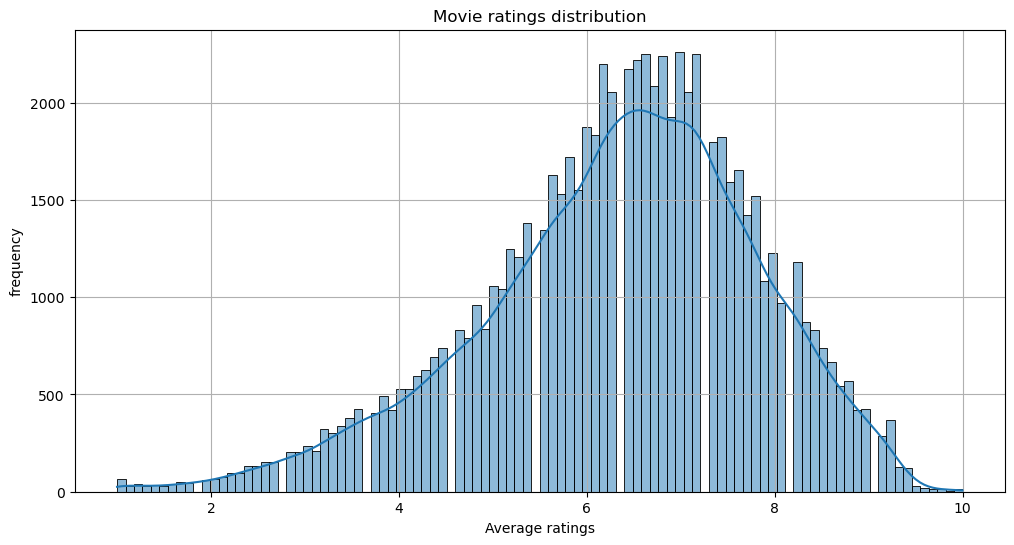

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(movies_df['averagerating'],kde=True,palette='GnBu')
plt.title("Movie ratings distribution")
plt.xlabel("Average ratings")
plt.ylabel('frequency')
plt.grid()
plt.show()

From the graph above we concluded that our movie ratings are normaly distributed with the average ratings around the mean

The graph is rightly schewed towards the positive

#### Top rated genres

/tmp/ipykernel_58364/3799780956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette="viridis")


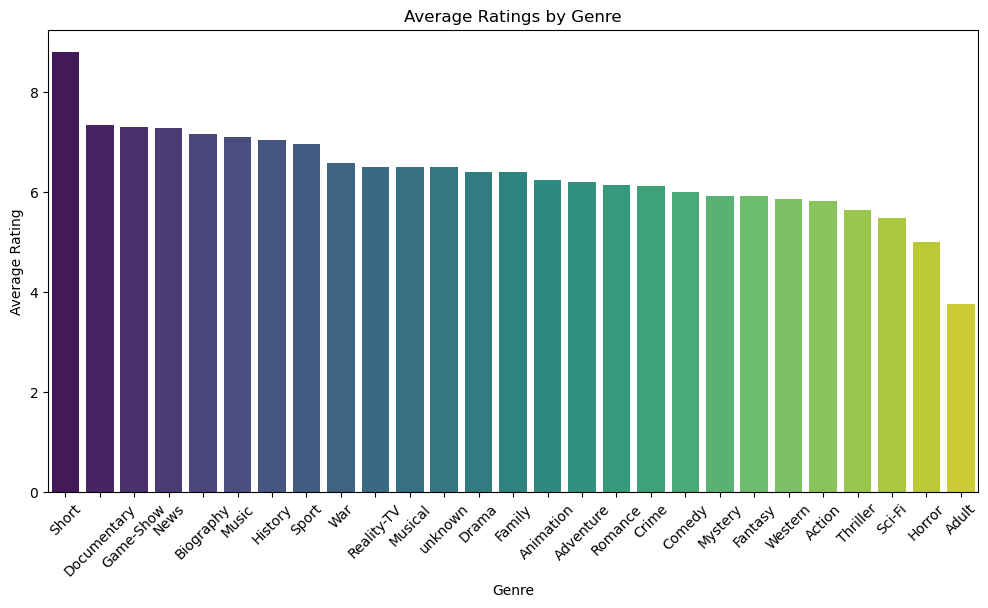

In [51]:
genre_avg_rating = genre_df.groupby("genres")["averagerating"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

From the graph the highest average rating goes to short films

The top-five geners to be concidered are short films,Documentary,Game-Show,News

##### Scatter plot of rating vs votes

/tmp/ipykernel_58364/561385375.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=genre_df['numvotes'],x=genre_df['averagerating'],palette='GnBu',alpha=0.5)


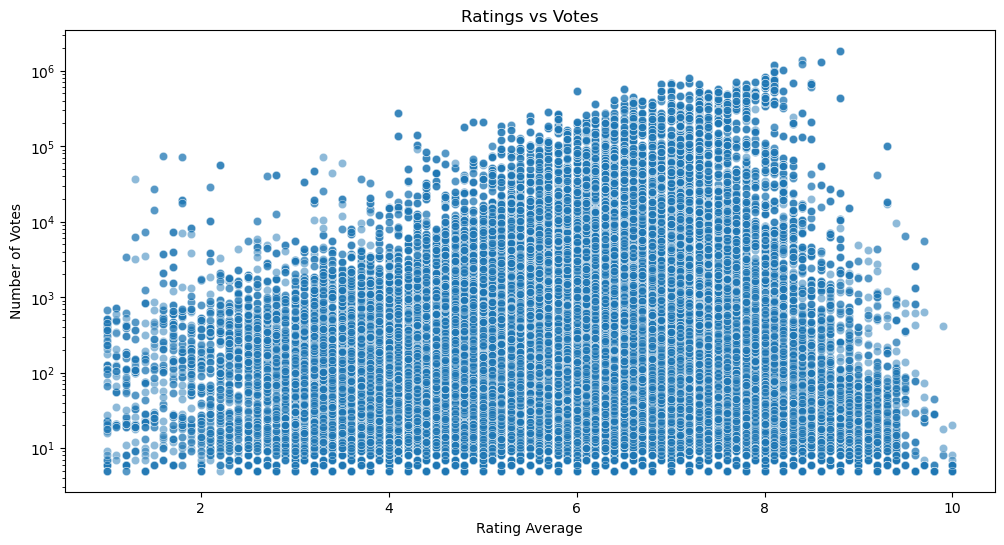

In [52]:
plt.figure(figsize=(12,6))
sns.scatterplot(y=genre_df['numvotes'],x=genre_df['averagerating'],palette='GnBu',alpha=0.5)
plt.yscale('log')
plt.title('Ratings vs Votes')
plt.ylabel('Number of Votes')
plt.xlabel('Rating Average')
plt.show()


In [56]:
genre_stats = genre_df.groupby('genres').agg({ 'movie_id': 'count', 'averagerating': 'mean', 'numvotes': 'sum' }).reset_index()

genre_stats

,genres,movie_id,averagerating,numvotes
0,Action,6988,5.810361,101161682
1,Adult,3,3.766667,164
2,Adventure,3817,6.196201,84232589
3,Animation,1743,6.248308,15353302
4,Biography,3809,7.162274,21609446
5,Comedy,17290,6.002689,74305805
6,Crime,4611,6.115441,39631356
7,Documentary,17753,7.332090,4739345
8,Drama,30788,6.401559,119567500
9,Family,3412,6.394725,8636710


In [59]:
genre_stats.columns = ['genre', 'movie_count', 'avg_rating', 'total_votes']


In [62]:
genre_stats = genre_stats.sort_values('total_votes', ascending=False)
genre_stats

,genre,movie_count,avg_rating,total_votes
8,Drama,30788,6.401559,119567500
0,Action,6988,5.810361,101161682
2,Adventure,3817,6.196201,84232589
5,Comedy,17290,6.002689,74305805
23,Thriller,8217,5.639114,48155313
20,Sci-Fi,2206,5.489755,42960289
6,Crime,4611,6.115441,39631356
19,Romance,6589,6.146608,26913873
10,Fantasy,2126,5.919473,26335704
16,Mystery,3039,5.920401,24657286


### The quality of the movies compared to the Genre

/tmp/ipykernel_58364/3102815206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= genre_stats['genre'], y=genre_stats['total_votes'], palette="GnBu")


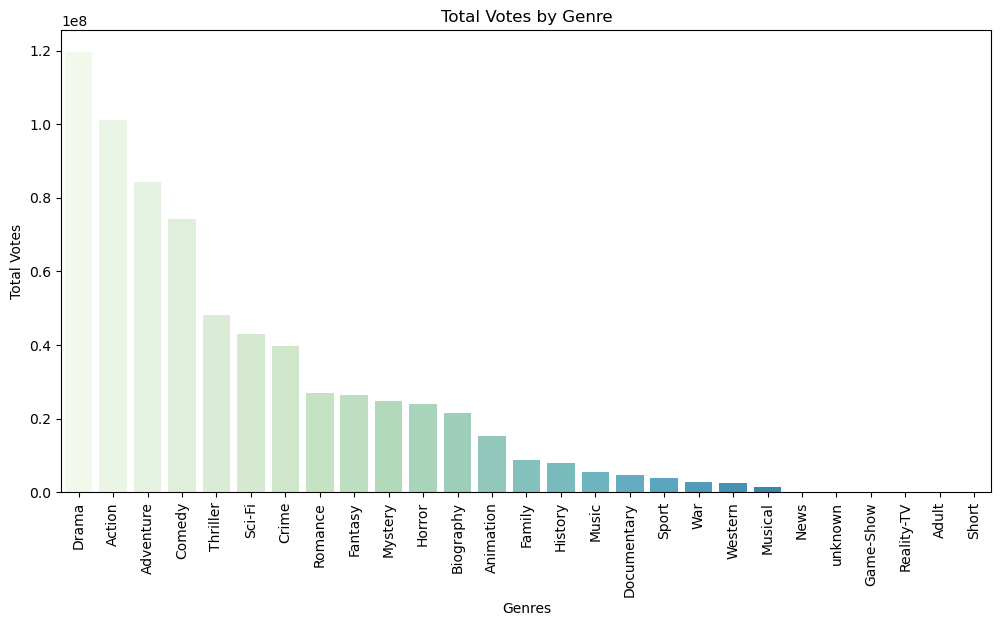

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x= genre_stats['genre'], y=genre_stats['total_votes'], palette="GnBu")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Total Votes")
plt.title("Total Votes by Genre")
plt.show()

In [67]:
movie_count=genre_df['start_year'].value_counts().sort_index()
movie_count

start_year
2010    11866
2011    12899
2012    13456
2013    14707
2014    15566
2015    15324
2016    15105
2017    14521
2018    12333
2019     3517
Name: count, dtype: int64

### Graph showing number of movies released over different years

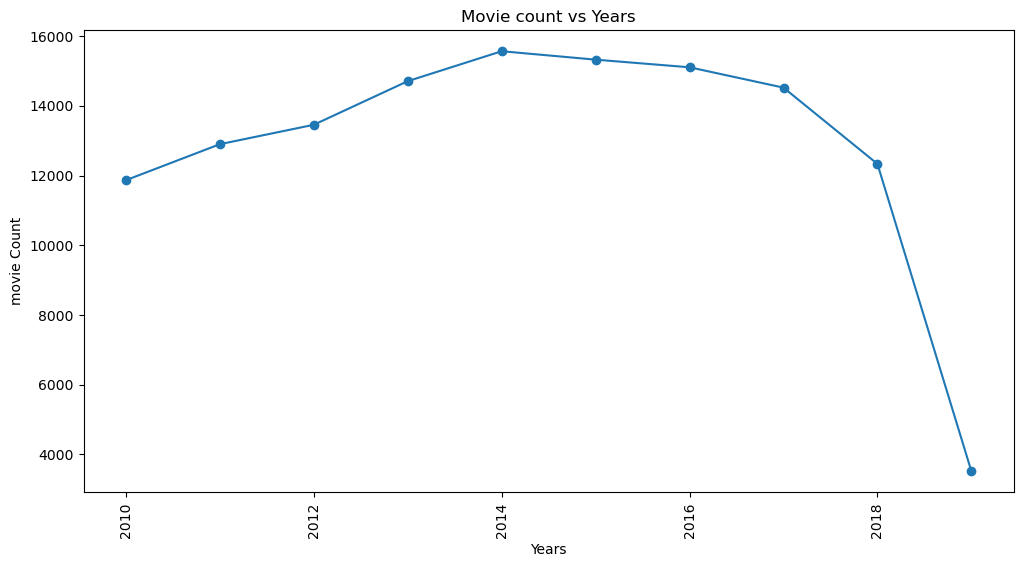

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(movie_count.index,movie_count.values,marker='o')
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("movie Count")
plt.title("Movie count vs Years")
plt.show()

From the year 2014 the number of movies realised has been dropping meaning people might been doing away with watching movies